In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Section 1- Load and Visualize dataset
* Download
* Load
* Visualize
* Normalisation


In [3]:
#Loading Dataset
X=pd.read_csv('Linear_X_Train.csv')
y=pd.read_csv('Linear_Y_Train.csv')

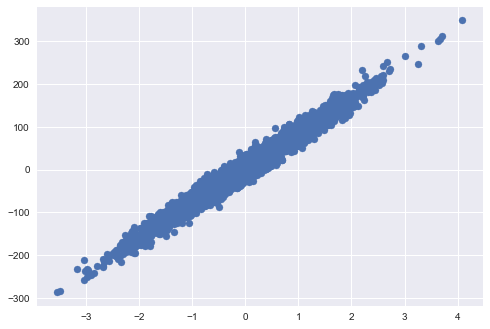

In [4]:
#Visualise Dataset
plt.style.use('seaborn')
plt.scatter(X,y)
plt.show()

In [ ]:
#Convert X and y to numpy arrays 
X=X.values
y=y.values

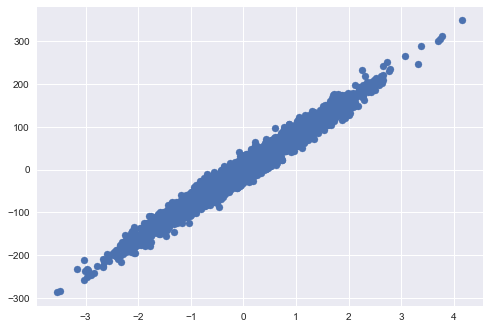

In [5]:
#Data Normalization
u=X.mean()
std=X.std()

X=(X-u)/std

#Visualise Dataset after Normalization
plt.style.use('seaborn')
plt.scatter(X,y)
plt.show()

## Section 2- Linear Regression

In [31]:
def hypothesis(x,theta):
    #theta=[theta0, theta1]
    y_=theta[0]+theta[1]*x
    return y_

def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        x=X[i]
        y_=hypothesis(X[i],theta)
        y=Y[i]
        grad[0] +=(y_ - y)
        grad[1] += (y_ - y)*x
        
    return grad/m

def gradientDescent(X,Y,max_steps=100,learning_rate=0.1):
    theta=np.zeros((2,))
    error_list=[]
    
    
    for i in range(max_steps):
        #compute grad
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        #Update theta
        theta[0]=theta[0] - learning_rate*grad[0]
        theta[1]=theta[1] - learning_rate*grad[1]
        
    return theta,error_list
        
def error(X,Y,theta):
    m=X.shape[0]
    total_error=0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error+=(y_ - Y[i])**2
        
    return total_error/m 

In [32]:
theta,error_list=gradientDescent(X,y)

In [33]:
theta

array([ 0.6838508 , 79.90361453])

In [34]:
error_list

[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array(

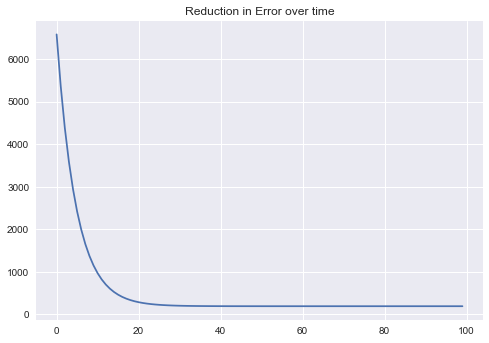

In [35]:
plt.plot(error_list)
plt.title('Reduction in Error over time')
plt.show()

# Section-3 Prediction and Best Line

In [36]:
y_ = hypothesis(X,theta)

In [37]:
y_

array([[-19.5733619 ],
       [-43.69571729],
       [ 86.4848761 ],
       ...,
       [-20.85044708],
       [138.70197319],
       [-35.87897262]])

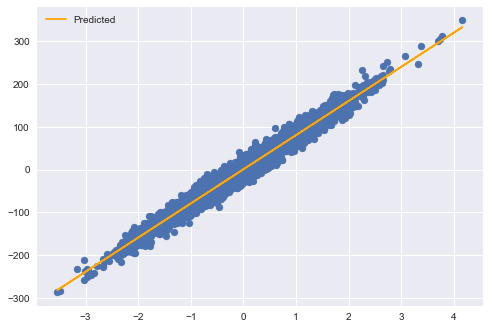

In [39]:
#Plot predicted and original data
plt.scatter(X,y)
plt.plot(X,y_, color='orange', label='Predicted')
plt.legend()

In [54]:
#Loading Test Data
x_test=pd.read_csv('Linear_X_Test.csv').values
y_test=hypothesis(x_test,theta)

In [55]:
y_test

array([[-149.37069577],
       [ -68.75494042],
       [-201.48687035],
       ...,
       [  10.9121384 ],
       [ -21.53235759],
       [ -53.68460035]])

In [56]:
#Submitting Predictions for online challeneges
df=pd.DataFrame(data=y_test, columns=["y"])

In [58]:
df.to_csv('y_predictions.csv',index=False)

# Computing Score using R-square

In [62]:
def r2_score(Y,Y_):
    num=np.sum((Y-Y_)**2)
    denom=np.sum((Y-Y.mean())**2)
    
    score= (1-num/denom)
    return score*100

In [63]:
r2_score(y,y_)

97.09612226971643